In [19]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


# Curva rotación de Galaxias

Una de las primeras evidencias de la existencia de la materia oscura fueron las curvas de rotación planas de las 
galaxias espirales. Si asumimos que el presupuesto total de la masa de una galaxia está hecho enteramente de materia 
luminosa, la velocidad circular orbital de las estrellas alrededor del plano de la galaxia debería decaer de acuerdo 
con un potencial de Keplerian. Sin embargo, este no es el caso y la velocidad circular apenas disminuye en un radio 
mayor, lo que indica la presencia de un nuevo componente de materia no visible (materia oscura). Cuando es necesario 
determinar qué tan masivo es el halo de materia oscura que incrusta una galaxia, se requiere una integración de la 
velocidad circular. Sin embargo, debido a la disposición finita de una cámara CCD, solo se puede medir un conjunto 
discreto de velocidades y se requieren técnicas de interpolación.

En esta actividad tomaremos un conjunto de datos discretos de la velocidad circular en función del radio de la galaxia NGC 2403.

1. Realizaremos una interpolación tanto lineal como de Lagrange a la galaxia NGC 2403.

2. Suponga que posee los siguientes modelos de galaxias:

a. Suponga que el disco es un disco exponencial y que el halo de materia oscura sigue un perfil de densidad de Hernquist (ese será su modelo, los parámetros del disco y del halo serán los parámetros del modelo). Suponga además que la galaxia no tiene bulbo.

b. Suponga que el disco es un disco exponencial,  el bulbo sigue un perfil de densidad de Hernquist. y que el halo de materia oscura sigue un perfil de densidad de Navarro-Frenk-White (NFW)

Ajuste la curva de rotación observada a cada modelo y obtenga los parámetros estructurales de la galaxia ($\rho_0$, $a$, $R_s$, $h$, $\Sigma_0$) .

Para imponer restricciones (constraints) sobre los valores que deben tomar los parámetros estructurales
del halo, primero haga un ajuste a la curva de rotación suponiendo que esta NO tiene disco.

NOTA: Recuerde que los campos gravitaciones cumplen el principio de superposición.

Modelo de Galaxia: https://kof.zcu.cz/st/dis/schwarzmeier/galaxy_models.html
5.4.3 Perfil de Hernquist
5.7 Función velocidad
5.9.2 Disco exponencial

NFW: https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile

Perfil de Navarro–Frenk–White

\begin{equation}
\rho (r) = \frac{\rho_0}{\frac{r}{R_s}\left(1+\frac{r}{R_s}\right)^2}\,,
\end{equation}
\begin{equation}
M = 4 \pi \rho_0 R_s^3 \left[ \ln \left(\frac{R_s + r}{R_s} \right) - \frac{r}{R_s + r}\right] \,.
\end{equation}

Perfil de Disk

\begin{equation}
\Sigma (r) = \Sigma _0 e^{r/h}\,,
\end{equation}

\begin{equation}
M = 2 \pi \Sigma_0 y (I_0(y)K_0(y)-I_1(y)K_1(y))\,.
\end{equation}
Con $ y = \frac{r}{2h} $

las funciones $I_0(x)$ y $K_0(x)$ son las funciones de Bessel modificadas de 1er y 2da especie. 
utilice las funciones de scipy.special iv(n, x) y kv(n, x), donde $n$ hace referencia al orden de la función (n=0 ó 1) y $x$ al valor en el cual se desea valor la función

Perfil de Hernquist

\begin{equation}
\rho (r) = \frac{4 \pi \rho_0}{3}\frac{a^4}{r}\frac{1}{(r+a)^3}\,,
\end{equation}

\begin{equation}
M = \frac{4 \rho_0 \pi a r^2}{\left( 1 + \frac{r}{a} \right)^2}\,.
\end{equation}

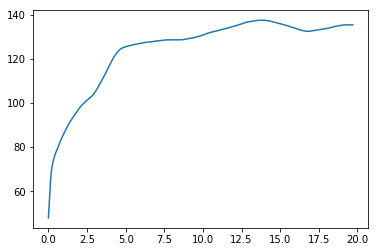

In [25]:
r, vr = np.loadtxt('2403.dat', usecols=(0,1), unpack=True, comments='#')
plt.plot(r,vr)

In [26]:
G=
R = np.linspace(r[1],r[-1], num=len(r))
guess=[14.,4.18e6]

In [29]:
def NFW(r,A,rho):
    vc2= 4.0*A**3*G*np.pi*rho((A+r)*np.log((A+r)/A)-r)/(r*(A+r))
    return vc2

In [31]:
def Disk(r,Rd,sigma0):
    vc2=np.pi*G*Sigma0*r*(r/Rd)*(special.iv(0,r/(2.0*Rd))*special.kv(0,r/82.0*Rd))
     -special.iv(1,r/(2.0*Rd))*special.kv(1,r/*(2.0*Rd))
    return vc2

SyntaxError: invalid syntax (<ipython-input-31-3ec3b3822a88>, line 2)